# Random sample Imputation
* Missing values are replaced with a randomly selected data from the same variable's available data
* Works for both categorical and numerical data
* Preserves the Variance of the variable
* Well suited for linear models as it does not distort the distribution
* Not suited for algo like decsion tree, since randomness is introduced
* Memory heavy for deployment, as we need to store the original training set to extract values from and replace the NA in coming observations


## Random sample Imputation for Numerical data

In [1]:
# Loading data
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
# Find % of missing values
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [3]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [4]:
X_train['Age_Imputed'] = X_train['Age']
X_test['Age_Imputed'] = X_test['Age']

In [6]:
# find number of missing values in Age_imputed column
n_missing = X_train['Age_Imputed'].isnull().sum()

# Randomly sample from existing age values
random_sample = X_train['Age'].dropna().sample(n_missing).values

# Fill missing values from the random_sample
X_train.loc[X_train['Age_Imputed'].isnull(), 'Age_Imputed'] = random_sample

In [10]:
X_train['Age'].isnull().sum()

np.int64(141)

In [11]:
X_train['Age'].dropna().sample(n_missing).values

array([42., 52., 38., 35., 32., 49., 19., 24., 59., 27., 30., 10.,  3.,
       20., 20., 42., 29., 36., 30., 17., 65., 29., 13., 28., 41., 34.,
       57.,  9., 29., 28., 47., 29., 31., 18., 47.,  8.])

In [13]:
X_train.sample(10)

,Age,Fare,Age_Imputed
227,20.5,7.2500,20.5
30,40.0,27.7208,40.0
132,47.0,14.5000,47.0
770,24.0,9.5000,24.0
674,NaN,0.0000,60.0
542,11.0,31.2750,11.0
10,4.0,16.7000,4.0
333,16.0,18.0000,16.0
279,35.0,20.2500,35.0
651,18.0,23.0000,18.0


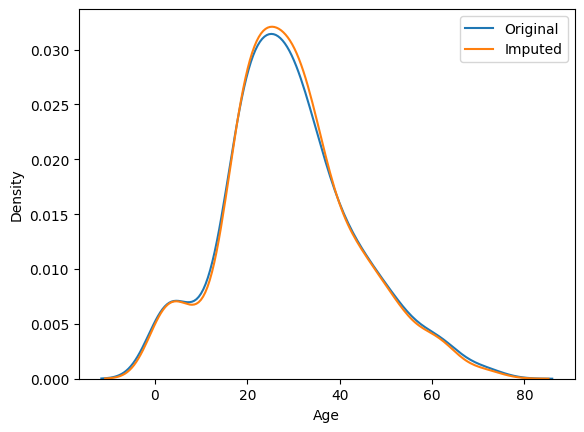

In [16]:
# Before and after kdeplot of Age
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_Imputed'], label='Imputed')
plt.legend()

In [18]:
# before and after variance of age
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_Imputed'].var())

Original variable variance:  203.85015782591321
Variance after random imputation:  193.59675365267302


In [20]:
# before and after covariance of age with fare
X_train[['Fare', 'Age', 'Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2132.834261,67.097473,50.906091
Age,67.097473,203.850158,203.850158
Age_Imputed,50.906091,203.850158,193.596754


<Axes: >

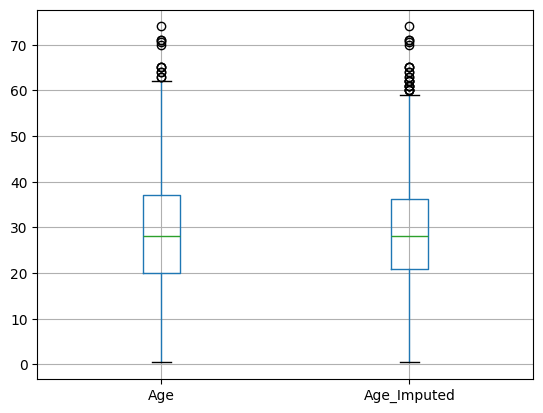

In [21]:
# before and after boxplot of Age
X_train[['Age', 'Age_Imputed']].boxplot()

In [26]:
# setting random_state to ensure the random value of age is same for a particular vaue of Fare
observation = X_train.iloc[0]
sample_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
sample_value

,Age
98,34.0


##Random sample Imputation for Categorical data

In [27]:
# Loading data
df = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
# Find % of missing values
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [29]:
# train test split
from sklearn.model_selection import train_test_split
X = df
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [31]:
# find number of missing values in GarageQual_imputed column
n_missing = X_train['GarageQual_imputed'].isnull().sum()

# Randomly sample from existing GarageQual values
random_sample = X_train['GarageQual'].dropna().sample(n_missing).values

# Fill missing values from the random_sample
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = random_sample

In [32]:
# find number of missing values in FireplaceQu_imputed column
n_missing = X_train['FireplaceQu_imputed'].isnull().sum()

# Randomly sample from existing FireplaceQu values
random_sample = X_train['FireplaceQu'].dropna().sample(n_missing).values

# Fill missing values from the random_sample
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = random_sample

In [33]:
X_train.sample(10)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
888,TA,TA,268000,TA,TA
1369,TA,TA,232000,TA,TA
67,NaN,TA,226000,TA,TA
596,NaN,TA,114504,TA,Fa
510,TA,TA,164900,TA,TA
264,NaN,TA,73000,TA,Gd
580,Gd,TA,181900,TA,Gd
588,Gd,TA,143000,TA,Gd
110,NaN,TA,136900,TA,TA
1143,NaN,NaN,80000,Fa,Po


In [37]:
# Frequency of categories in GargeQual before and after imputation
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.952856,0.952911
Fa,0.034451,0.035103
Gd,0.008160,0.007705
Ex,0.002720,0.002568
Po,0.001813,0.001712


In [38]:
# Frequency of categories in FireplaceQu' before and after imputation
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.478964,0.381507
TA,0.415858,0.334932
Fa,0.050162,0.039726
Po,0.029126,0.023973
Ex,0.025890,0.019863


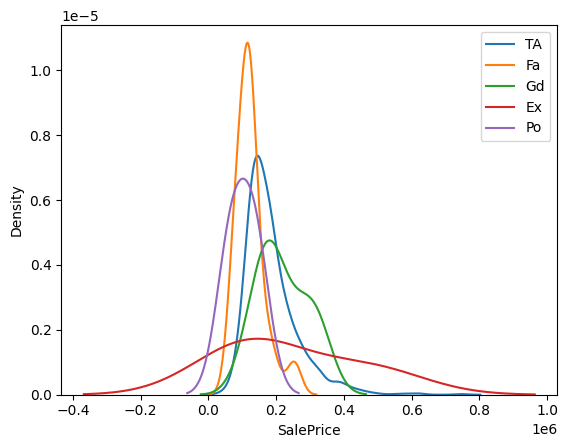

In [44]:
# before and after kdeplot for categories in GarageQual => Not much change due to less % of missing values

# before
for category in X_train['GarageQual'].dropna().unique():
    sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

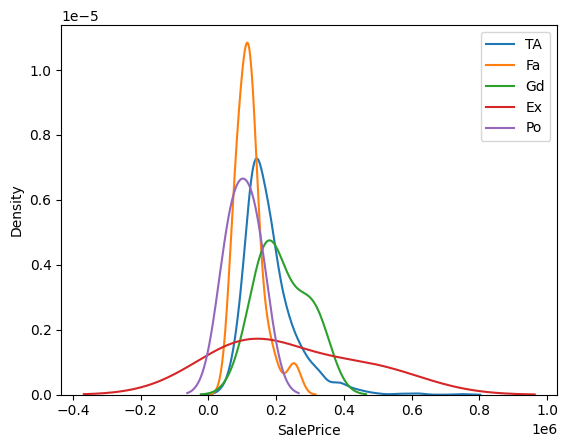

In [45]:
# after
for category in X_train['GarageQual_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['GarageQual_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

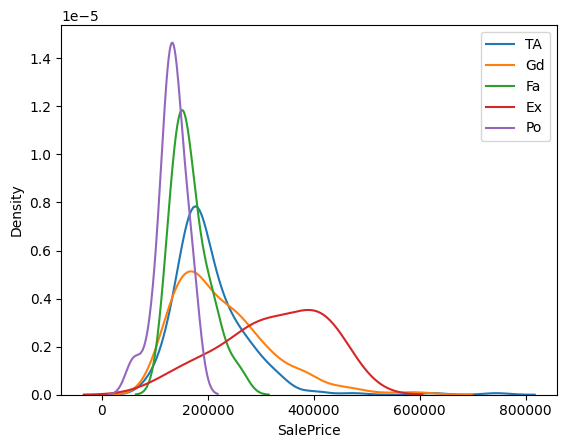

In [41]:
# before and after kdeplot for categories in fireplace => Change is visible since % of missing values is higher

# before
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

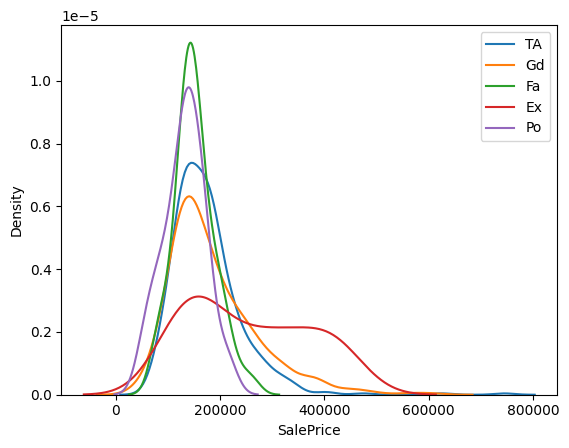

In [42]:
# after
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()